In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv('C:\\Users\\Admin\\Downloads\\AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
data.shape

(48895, 16)

In [4]:
#Checking NULL values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Removing null values

In [5]:
data= data[~data.name.isnull()]

In [6]:
data= data[~data.host_name.isnull()]

In [7]:
data.drop('last_review',inplace=True,axis=1)

In [8]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
data.room_type.value_counts()

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

In [13]:
data.neighbourhood.value_counts()

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [14]:
data.neighbourhood_group.value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [31]:
data.minimum_nights.describe()

count    48858.000000
mean         7.012444
std         20.019757
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

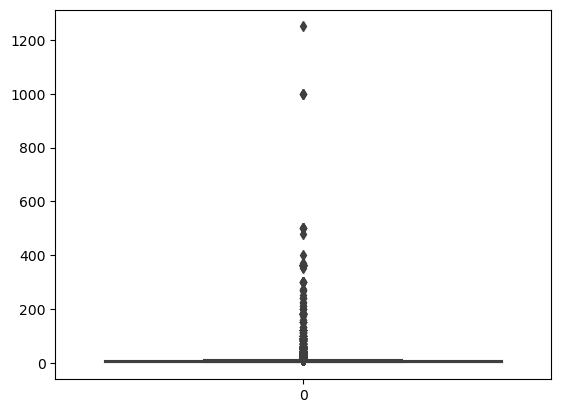

In [25]:
sns.boxplot(data=data.minimum_nights)
plt.show()

#### Checking for wrong values

In [28]:
data.latitude.describe()

count    48858.000000
mean        40.728941
std          0.054528
min         40.499790
25%         40.690090
50%         40.723070
75%         40.763107
max         40.913060
Name: latitude, dtype: float64

In [29]:
data.longitude.describe()

count    48858.000000
mean       -73.952170
std          0.046159
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936280
max        -73.712990
Name: longitude, dtype: float64

In [30]:
data.price.describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

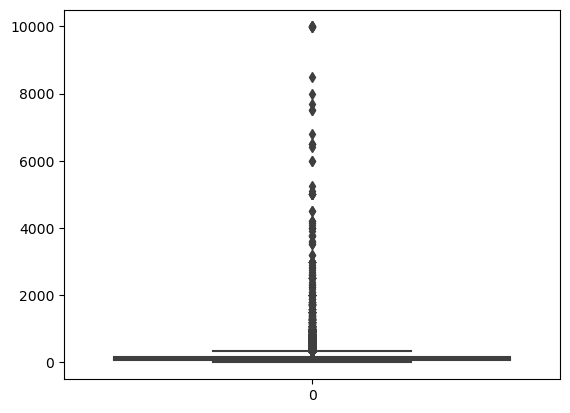

In [29]:
sns.boxplot(data=data.price)
plt.show()

In [15]:
data.number_of_reviews.describe()

count    48858.000000
mean        23.273098
std         44.549898
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [17]:
data.calculated_host_listings_count.describe()

count    48858.000000
mean         7.148369
std         32.964600
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [18]:
data.availability_365.describe()

count    48858.000000
mean       112.801425
std        131.610962
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

#### No wrong values or major outliers were found

In [28]:
# Exporting back the new edited file 
data.to_csv(r'C:\Users\Admin\Downloads\airbnb.csv',index=False, header=True)